In [1]:
import matplotlib.pyplot as plt
import json
import numpy as np

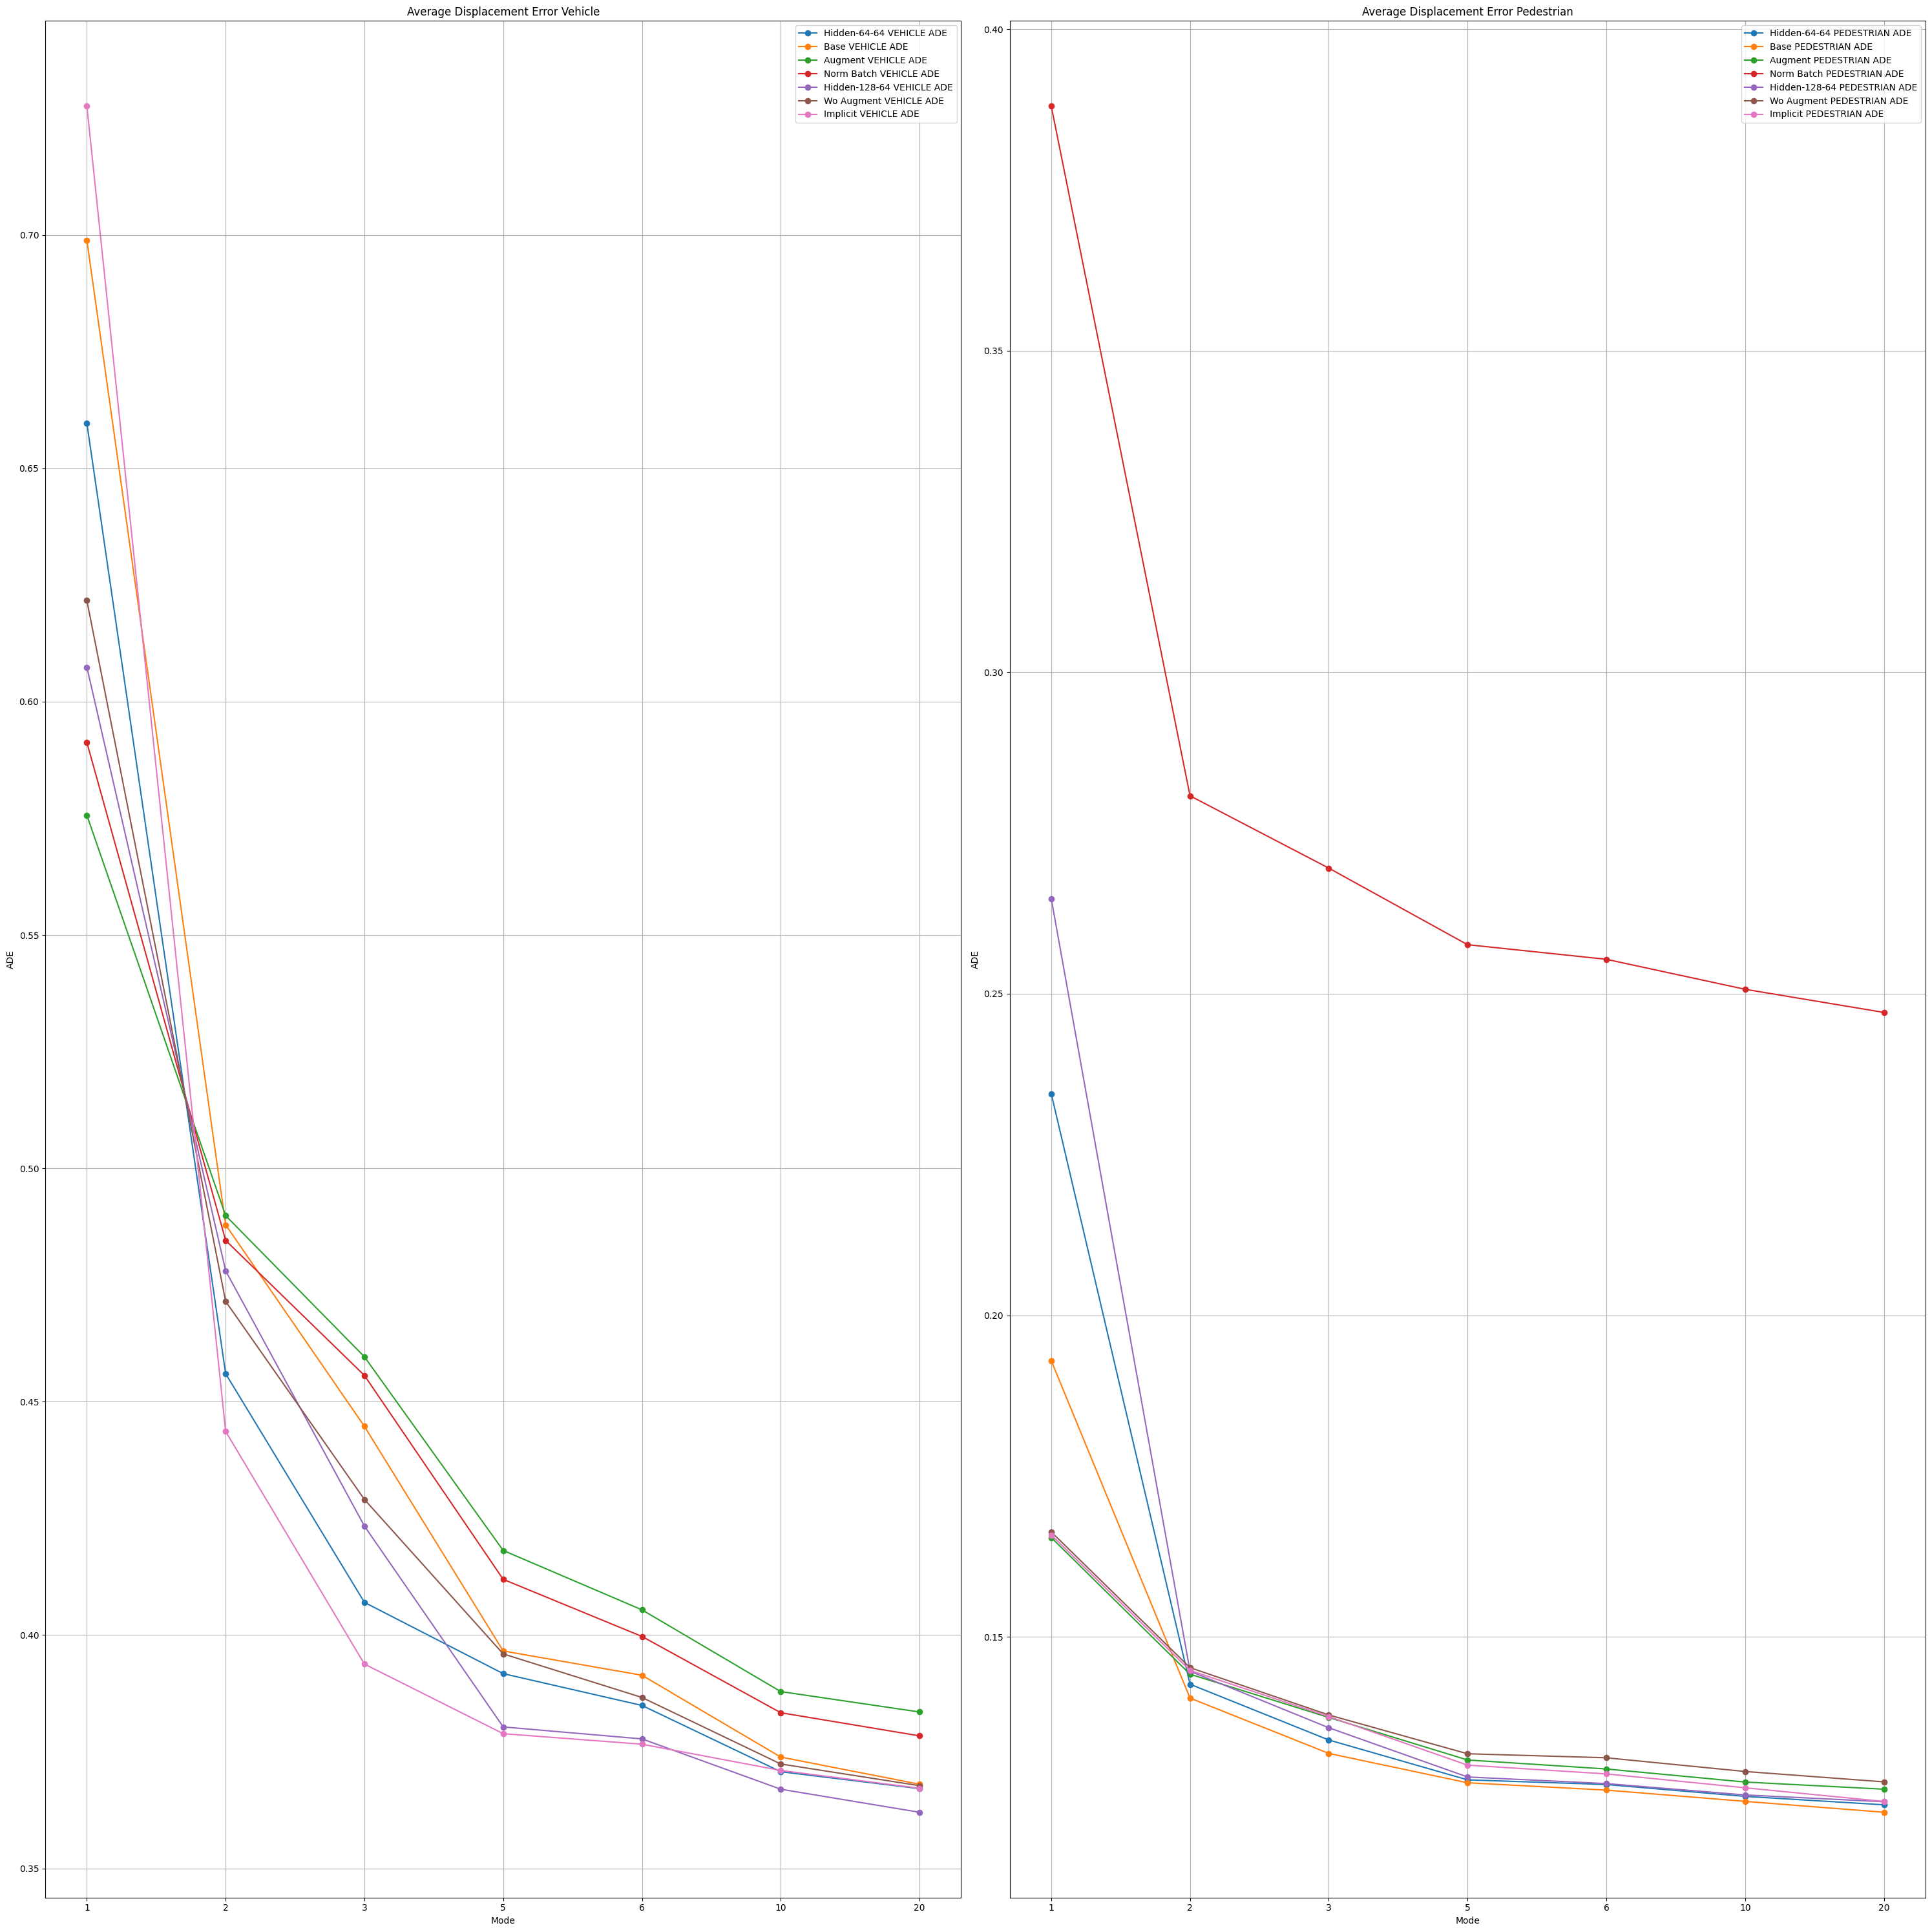

In [16]:
# Function to load data from a JSON file
def load_data(file_path):
    with open(file_path, 'r') as file:
        return json.load(file)

# Function to plot ADE, FDE, and collision score for multiple files
def plot_metrics_multiple_files(file_paths, labels):
    modes = ['1', '2', '3', '5', '6', '10', '20']
    fig, axs = plt.subplots(1, 2, figsize=(30, 30))
    
    for file_path, label in zip(file_paths, labels):
        data = load_data(file_path)
        
        # Assuming the structure is the same for Vehicle and Pedestrian in all files
        # Loop through classes if needed
        class_type = 'VEHICLE'
        ade = [data[class_type][mode]['ADE'] for mode in modes]
        fde = [np.mean(data[class_type][mode]['FDE']) for mode in modes]  # Example with mean FDE
        coll_score = [np.mean(data[class_type][mode]['coll_score']) for mode in modes]  # Example with mean collision score
        
        axs[0].plot(modes, ade, marker='o', label=f'{label} {class_type} ADE')
        # axs[1, 0].plot(modes, fde, marker='o', label=f'{label} {class_type} FDE')
        # axs[2, 0].plot(modes, coll_score, marker='o', label=f'{label} {class_type} Collision Score')

        class_type = 'PEDESTRIAN'
        ade = [data[class_type][mode]['ADE'] for mode in modes]
        fde = [np.mean(data[class_type][mode]['FDE']) for mode in modes]  # Example with mean FDE
        coll_score = [np.mean(data[class_type][mode]['coll_score']) for mode in modes]  # Example with mean collision score
        
        axs[1].plot(modes, ade, marker='o', label=f'{label} {class_type} ADE')
        # axs[1, 1].plot(modes, fde, marker='o', label=f'{label} {class_type} FDE')
        # axs[2, 1].plot(modes, coll_score, marker='o', label=f'{label} {class_type} Collision Score')
    
    axs[0].set_title('Average Displacement Error Vehicle')
    axs[0].set_xlabel('Mode')
    axs[0].set_ylabel('ADE')
    axs[0].grid(True)
    axs[0].legend()

    axs[1].set_title('Average Displacement Error Pedestrian')
    axs[1].set_xlabel('Mode')
    axs[1].set_ylabel('ADE')
    axs[1].grid(True)
    axs[1].legend()

    # axs[1, 0].set_title('Final Displacement Error Vehicle')
    # axs[1, 0].set_xlabel('Mode')
    # axs[1, 0].set_ylabel('FDE')
    # axs[1, 0].grid(True)
    # axs[1, 0].legend()

    # axs[1, 1].set_title('Final Displacement Error Pedestrian')
    # axs[1, 1].set_xlabel('Mode')
    # axs[1, 1].set_ylabel('FDE')
    # axs[1, 1].grid(True)
    # axs[1, 1].legend()

    # axs[2, 0].set_title('Collision Score Vehicle')
    # axs[2, 0].set_xlabel('Mode')
    # axs[2, 0].set_ylabel('Collision Score')
    # axs[2, 0].grid(True)
    # axs[2, 0].legend()

    # axs[2, 1].set_title('Collision Score Pedestrian')
    # axs[2, 1].set_xlabel('Mode')
    # axs[2, 1].set_ylabel('Collision Score')
    # axs[2, 1].grid(True)
    # axs[2, 1].legend()

    plt.tight_layout()
    plt.show()


def plot_fde_coll_time_multiple_files(file_paths, labels):
    modes = ['1', '2', '3', '5', '6', '10', '20']
    timesteps = [1, 2, 3, 4, 5, 6, 7, 8]
    fig, axs = plt.subplots(7, 4, figsize=(20, 20))
    
    for file_path, label in zip(file_paths, labels):
        data = load_data(file_path)
        
        # Assuming the structure is the same for Vehicle and Pedestrian in all files
        # Loop through classes if needed
        for i, mode in enumerate(modes):
            class_type = 'VEHICLE'
            fde = data[class_type][mode]['FDE']  # Example with mean FDE
            coll_score = data[class_type][mode]['coll_score']  # Example with mean collision score
        
            axs[i, 0].plot(timesteps, fde, marker='o', label=f'{label} {class_type} FDE {mode}')
            axs[i, 1].plot(timesteps, coll_score, marker='o', label=f'{label} {class_type} Collision Score {mode}')

            class_type = 'PEDESTRIAN'
            fde = data[class_type][mode]['FDE']  # Example with mean FDE
            coll_score = data[class_type][mode]['coll_score']  # Example with mean collision score
            
            axs[i, 2].plot(timesteps, fde, marker='o', label=f'{label} {class_type} FDE {mode}')
            axs[i, 3].plot(timesteps, coll_score, marker='o', label=f'{label} {class_type} Collision Score {mode}')
    
    for i in range(7):
        axs[i, 0].set_title('Final Displacement Error Vehicle')
        axs[i, 0].set_xlabel('Timestep')
        axs[i, 0].set_ylabel('FDE')
        axs[i, 0].grid(True)
        axs[i, 0].legend()

        axs[i, 1].set_title('Collision Score Vehicle')
        axs[i, 1].set_xlabel('Timestep')
        axs[i, 1].set_ylabel('Collision Score')
        axs[i, 1].grid(True)
        axs[i, 1].legend()

        axs[i, 2].set_title('Final Displacement Error Pedestrian')
        axs[i, 2].set_xlabel('Timestep')
        axs[i, 2].set_ylabel('FDE')
        axs[i, 2].grid(True)
        axs[i, 2].legend()

        axs[i, 3].set_title('Collision Score Pedestrian')
        axs[i, 3].set_xlabel('Timestep')
        axs[i, 3].set_ylabel('Collision Score')
        axs[i, 3].grid(True)
        axs[i, 3].legend()

    plt.tight_layout()
    plt.show()

# Example usage
file_paths = ['eval_results/eval_results_poses-gt_poses-gt-w-augment-hidden-64-64_27_Jan_2024_15_15_38_68.json', 'eval_results/eval_results_base_base-retraining-complete30_Jan_2024_14_27_44_71.json', 'eval_results/eval_results_poses-gt_poses-gt-w-augment_27_Jan_2024_15_15_33_71.json', 'eval_results/eval_results_poses-gt_poses-gt-w-augment-norm-batch_27_Jan_2024_15_15_54_71.json', 'eval_results/eval_results_poses-gt_poses-gt-w-augment-hidden-128-64_27_Jan_2024_15_16_05_69.json', 'eval_results/eval_results_poses-gt_poses-gt-trial-wo-augment28_Jan_2024_23_17_48_71.json', 'eval_results/eval_results_poses-gt_poses-gt-wo-augment-implicit_27_Jan_2024_15_15_44_69.json']  # Update these paths
labels = ['Hidden-64-64', 'Base', 'Augment', 'Norm Batch', 'Hidden-128-64', 'Wo Augment', 'Implicit']  # Labels for the legend
plot_metrics_multiple_files(file_paths, labels)


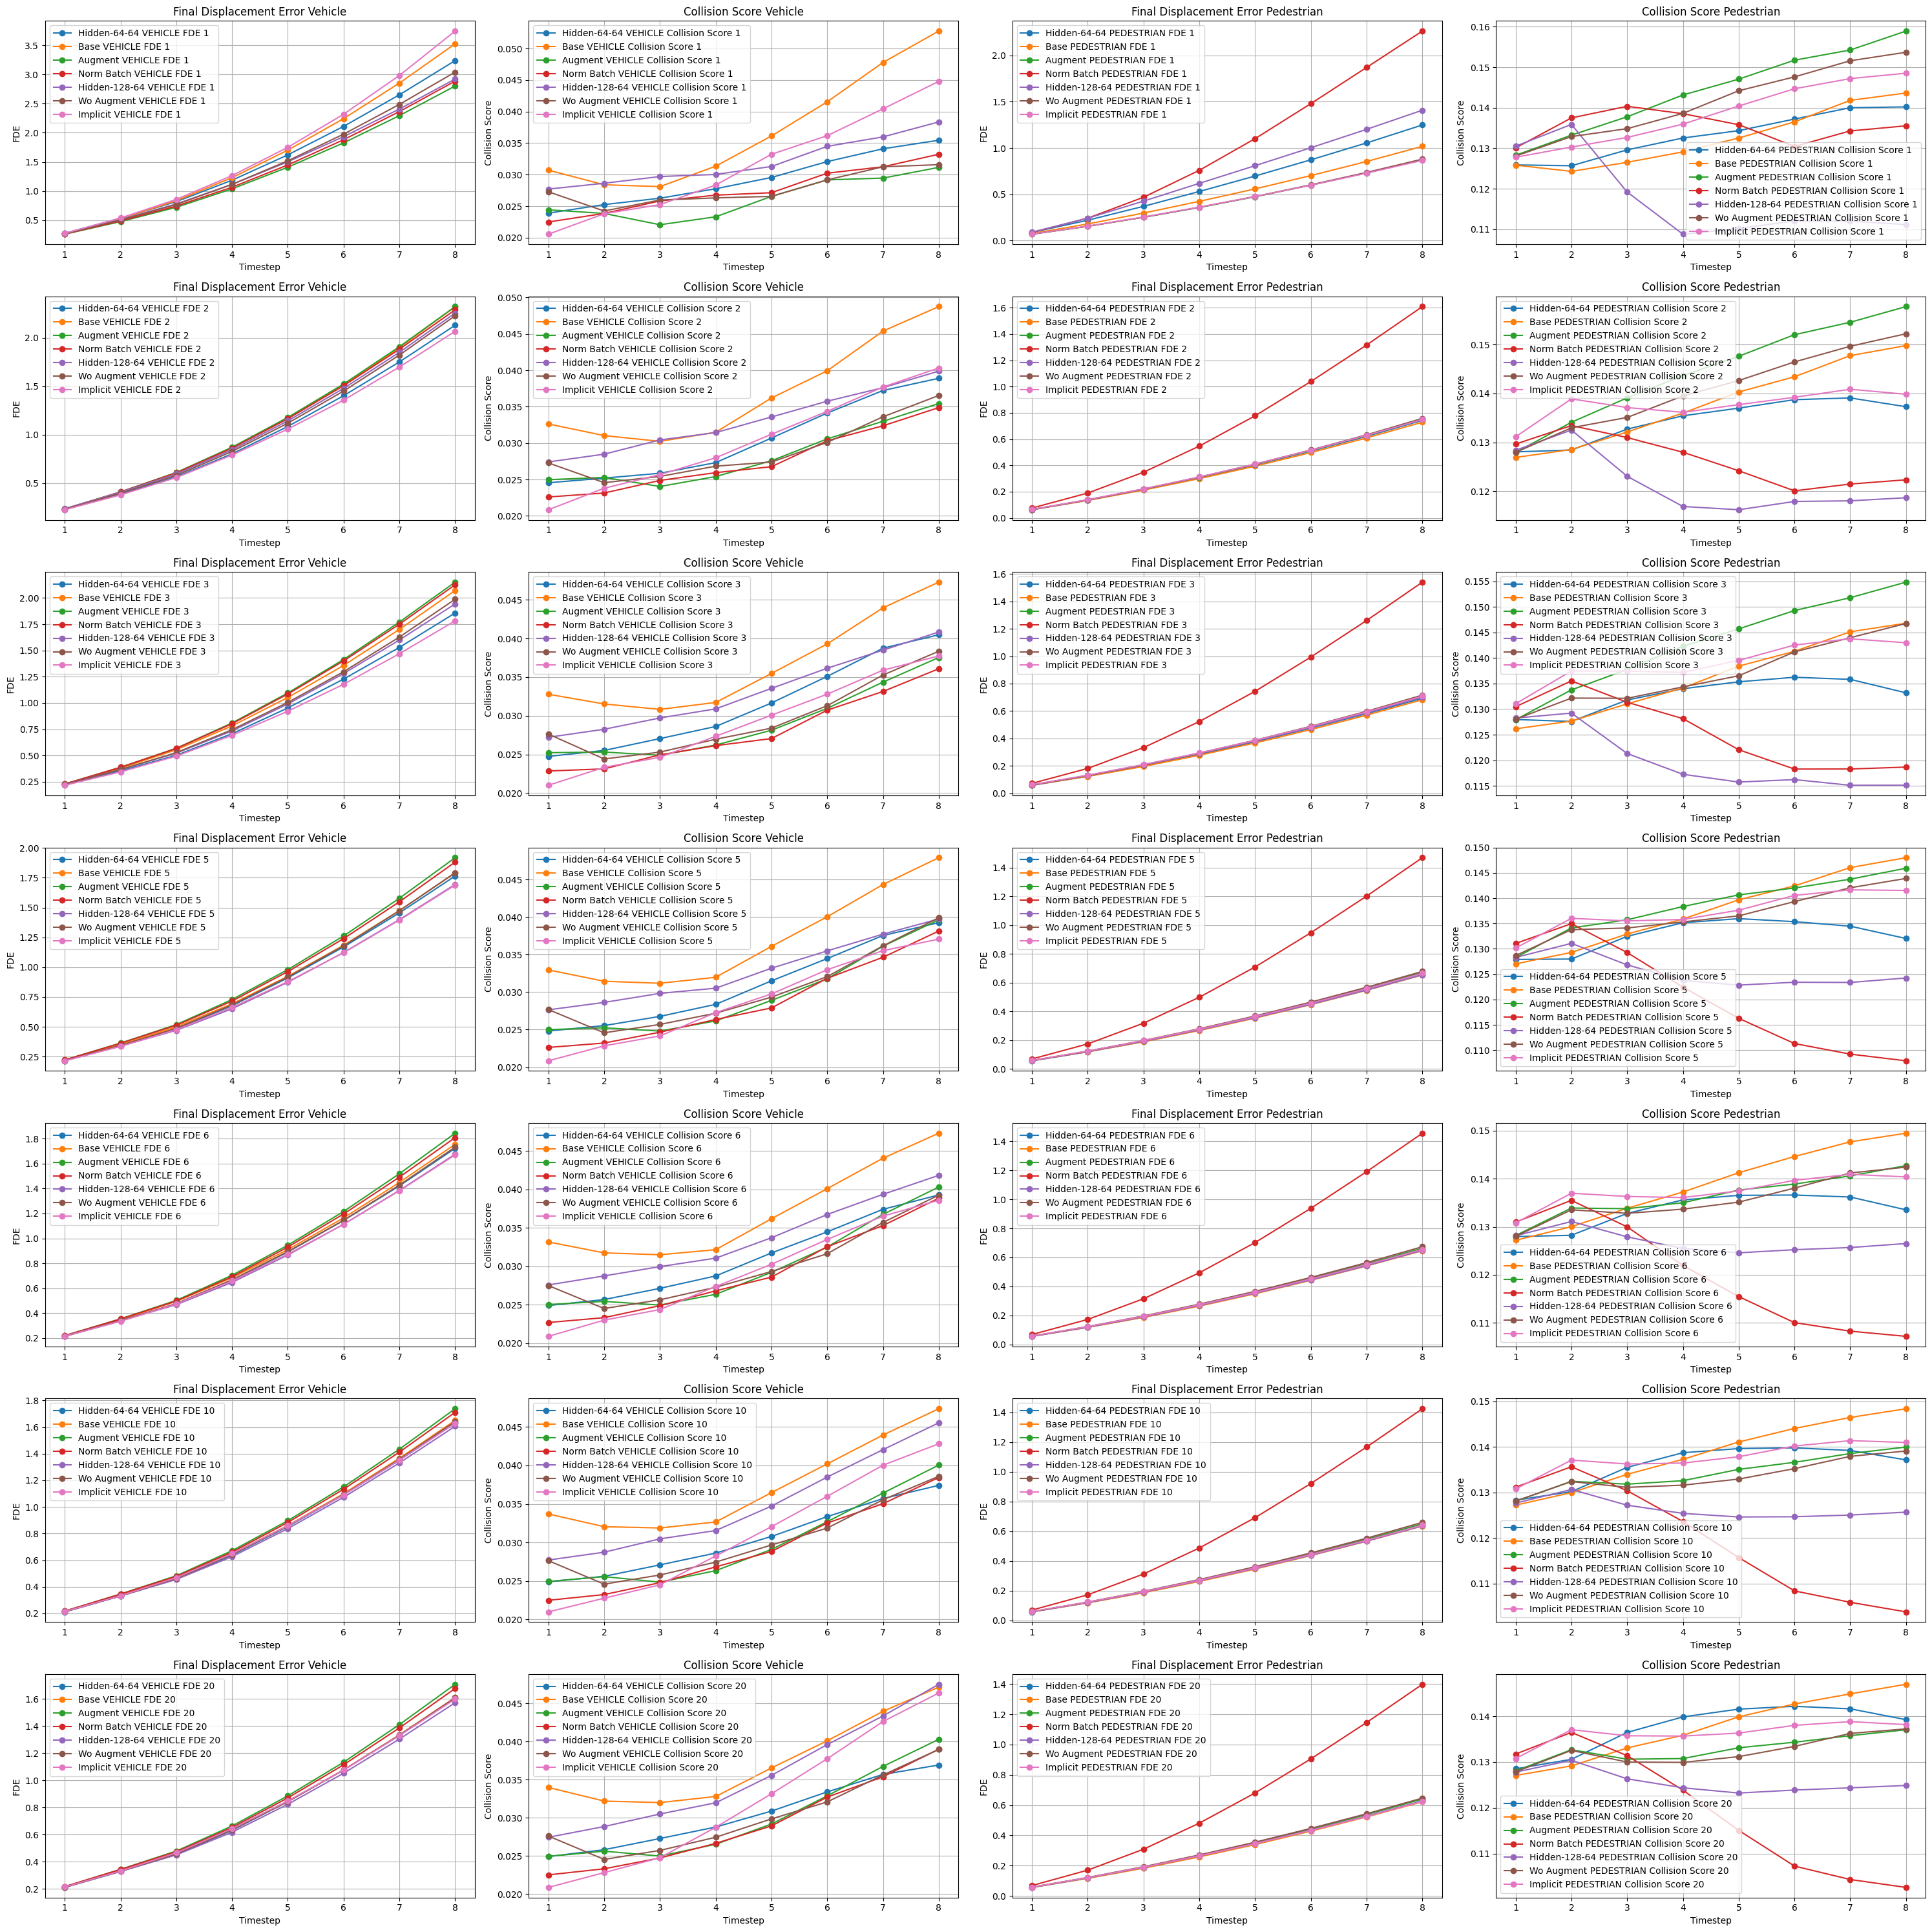

In [12]:
plot_fde_coll_time_multiple_files(file_paths, labels)